In [20]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [21]:
%matplotlib inline

In [22]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [23]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [24]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [25]:
names2011 = pd.read_csv('names/yob2011.txt')

In [26]:
names2011.head()

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236


In [27]:
names2011 = pd.read_csv('names/yob2011.txt',names=['name','sex','number'])

In [28]:
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [29]:
names_all = []

for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','number']))
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)

In [30]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [31]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


### To track the popularity of a name across all years

1. Setting and sorting indexes
2. Selecting rows by value of a multi-index
3. Making a stacked line plot in matplotlib

In [32]:
#Build a new multiindex dataframe with index using sex first, then name
#and then year. also sort the index.

allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In [33]:
allyears_indexed.head()

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5

In [34]:
# To plot popularity of a name
#To select rows by the value of index or by number of row use loc or iloc

allyears_indexed.loc['F','Mary']

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
1885,9128
1886,9890
1887,9888
1888,11754


In [35]:
#Writing a functio that does just this

def plotname(sex,name):
    data = allyears_indexed.loc[sex,name]
    
    pp.plot(data.index,data.values)

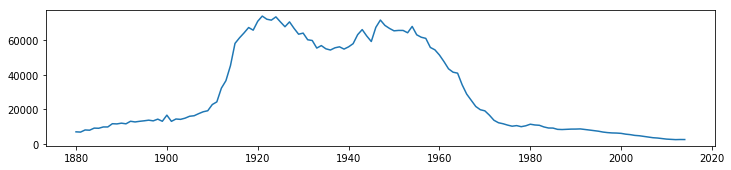

In [36]:
#adjust the aspect ratio of the figure to make it more pleasant
pp.figure(figsize=(12,2.5))
plotname('F','Mary')

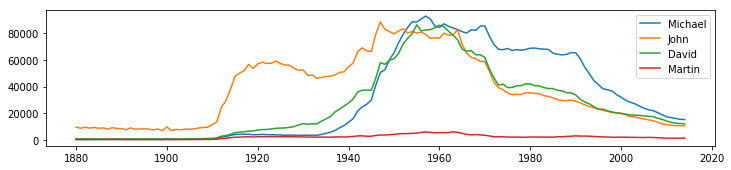

In [37]:
#Let's plot a few names together
pp.figure(figsize=(12,2.5))

names = ['Michael','John','David','Martin']

for name in names:
    plotname('M',name)
    
pp.legend(names)

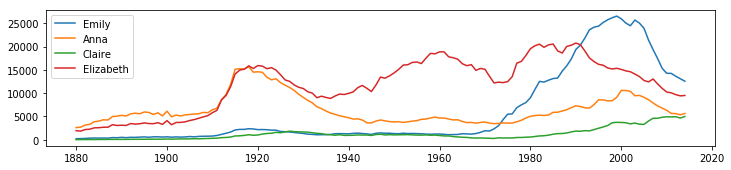

In [38]:
pp.figure(figsize=(12,2.5))

names = ['Emily','Anna','Claire','Elizabeth']

for name in names:
    plotname('F',name)
    
pp.legend(names)

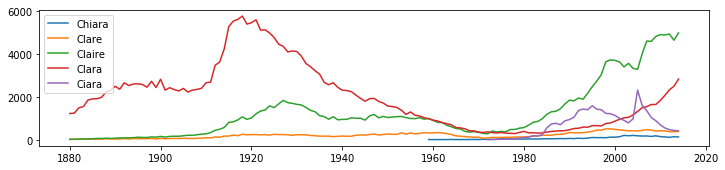

In [39]:
pp.figure(figsize=(12,2.5))

names = ['Chiara','Clare','Claire','Clara','Ciara']

for name in names:
    plotname('F',name)
    
pp.legend(names)

In [44]:
#We can visualize this plot as a cumulative plot, also known as a 
#stacked line chart. To plot the frequency of each variant on top of 
#the other ones, so that the overall height of the graph will track the
#total number of variants. This can be done using matplotlib stack plot.
#For that we need to first slightly change the shape of the table

#Select only the variants into a subtable
allyears_indexed.loc['F'].loc[names].head()

number
name   year        
Chiara 1959       9
       1960       5
       1962       8
       1963       8
       1964      12

In [45]:
#Unstack the multiindex using pandas unstack to promote the names 
#from index value to column names

allyears_indexed.loc['F'].loc[names].unstack(level=0).head()

number                           
name Chiara Ciara Claire   Clara Clare
year                                  
1880    NaN   NaN   21.0  1226.0  15.0
1881    NaN   NaN   23.0  1242.0  20.0
1882    NaN   NaN   30.0  1490.0  21.0
1883    NaN   NaN   38.0  1548.0  22.0
1884    NaN   NaN   33.0  1852.0  38.0

In [46]:
#Fill the NaNs with zeros using pandas fillna()

allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()

number                           
name Chiara Ciara Claire   Clara Clare
year                                  
1880    0.0   0.0   21.0  1226.0  15.0
1881    0.0   0.0   23.0  1242.0  20.0
1882    0.0   0.0   30.0  1490.0  21.0
1883    0.0   0.0   38.0  1548.0  22.0
1884    0.0   0.0   33.0  1852.0  38.0

In [47]:
variants = allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)


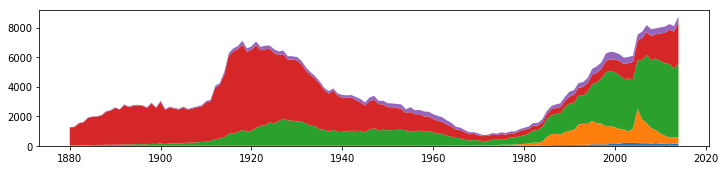

In [49]:
pp.figure(figsize=(12,2.5))

pp.stackplot(variants.index,variants.values.T)
#need to transpose the numpy table variants value

In [ ]:
#Stack plot does not support legend
#so to put names on this plot, use matplotlib text


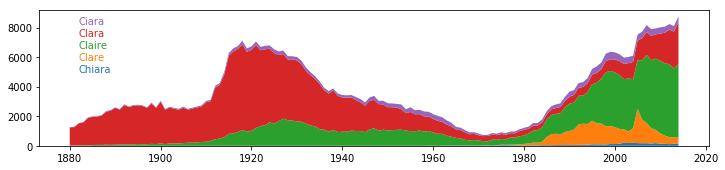

In [50]:
pp.figure(figsize=(12,2.5))

palette = seaborn.color_palette()

pp.stackplot(variants.index,variants.values.T)

for i, name in enumerate(names):
    pp.text(1882,5000+800*i,name,color=palette[i])